<a href="https://colab.research.google.com/github/MuhammadAnthar/SentimenAnalysist-DataMining/blob/main/Final_Project_C_Sentiment_Analysist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Sentimen pada Twitter Terhadap Kenaikan Pajak 12 %**

**Kelompok C**

| NIM               | Nama                        | Keterangan Pengerjaan                                      |
|-------------------|-----------------------------|------------------------------------------------------------|
| 1122094000003     | Hoirotun Nisa'              | Sentiment Analysist, Interpretasi/Insight, Presentasi          |
| 11220940000011    | Ulfatul Adawiyah            | Stopword Removal, Visualisasi, PPT                        |
| 11220940000027    | Windy Tri Oktaviani         | Stopword Removal, Interpretasi/Insight, PPT               |
| 11220940000029    | Muhammad Anthar Jailani Putra| Cleaning Text, Case Folding, Tokenize, Stemming, Visualisasi, Presentasi |
| 11220940000053    | Uswatun Hasanah             | Sentiment Analysist, Visualisasi, Interpretasi/Insight, PPT  |

# **DATA UNDERSTANDING**

## **Import Data**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

In [ ]:
url = "https://raw.githubusercontent.com/MuhammadAnthar/DatMin_SentimenAnalysist/main/Kenaikkan%20Pajak.csv"
data = pd.read_csv(url)
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1856865841973006350,Thu Nov 14 04:23:49 +0000 2024,1,@PreciosaKanti Atur sajalah . Negara ini toh m...,1856915919530070354,NaN,PreciosaKanti,in,NaN,0,0,0,https://x.com/prasilviat82682/status/185691591...,1651581934655651841,prasilviat82682
1,1856877191935791175,Thu Nov 14 01:49:56 +0000 2024,0,Sri Mulyani akan tetap menerapkan tarif Pajak ...,1856877191935791175,NaN,NaN,in,"Hounslow, London",0,0,0,https://x.com/IconMan17/status/185687719193579...,1509654566736113668,IconMan17
2,1856830466059542958,Wed Nov 13 22:44:16 +0000 2024,0,Pajak hanya untuk rakyat. Pengusaha yang dapat...,1856830466059542958,NaN,NaN,in,NaN,0,0,0,https://x.com/070Wid/status/1856830466059542958,1604130010553389058,070Wid
3,1856494431287030203,Wed Nov 13 01:46:40 +0000 2024,1,@Bryan_MyBoyx Nyang kost mah tiap bulan dibaya...,1856513981185438087,NaN,Bryan_MyBoyx,in,"DKI Jakarta, Indonesia",0,1,0,https://x.com/Duren___/status/1856513981185438087,1501606510979256323,Duren___
4,1855980123553747140,Tue Nov 12 01:15:20 +0000 2024,0,@cnbcindonesia Selamat buat 58 % yg telah memi...,1856143710301630692,NaN,cnbcindonesia,in,NaN,0,0,0,https://x.com/BryokAceh/status/185614371030163...,719084961039421440,BryokAceh


In [ ]:
data.drop_duplicates(subset="full_text", keep = 'first',  inplace = True)

In [ ]:
data['full_text'].isnull().sum()

0

In [ ]:
df = data[['username','in_reply_to_screen_name','full_text']]
df.rename(columns={'username': 'user', 'in_reply_to_screen_name': 'target'}, inplace=True)
df

<ipython-input-47-57755bb0b272>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'username': 'user', 'in_reply_to_screen_name': 'target'}, inplace=True)


,user,target,full_text
0,prasilviat82682,PreciosaKanti,@PreciosaKanti Atur sajalah . Negara ini toh m...
1,IconMan17,NaN,Sri Mulyani akan tetap menerapkan tarif Pajak ...
2,070Wid,NaN,Pajak hanya untuk rakyat. Pengusaha yang dapat...
3,Duren___,Bryan_MyBoyx,@Bryan_MyBoyx Nyang kost mah tiap bulan dibaya...
4,BryokAceh,cnbcindonesia,@cnbcindonesia Selamat buat 58 % yg telah memi...
...,...,...,...
2367,infinix302023,OlgaLy_DIA,@OlgaLy_DIA Kalau ga gini pegawai pajak ga bis...
2368,YasintaIcha,worksfess,@worksfess Klo kata sodaraku yg pernah kerja d...
2369,KaltaraTribun,NaN,Pendapatan Pajak Penerangan Meningkat Jalanan ...
2370,AnditaZella,NaN,Tiket pesawat mahal ya karena: avtur mahal dis...


# **PREPROCESSING**

##**CLEANING TEXT**



Di bawah ini terdapat beberapa fungsi untuk membersihkan teks dari elemen-elemen yang tidak diinginkan, seperti URL, tag HTML, emoji, username, angka, dan simbol. Proses pembersihan ini bertujuan untuk menghasilkan teks yang lebih bersih dan relevan untuk analisis lebih lanjut.

In [ ]:
def remove_URL(tweet): # Menghapus URL
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
  html = re.compile(r'<.*?>')
  return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
  tweet = re.sub(r'\d+', '', tweet)
  return tweet

def remove_symbols (tweet): # Menghapus simbol
  tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
  return tweet


In [ ]:
# Visualisasi clean dataset 'full_text'
df['cleaning'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_username(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))
df.head(10)

<ipython-input-49-7ec824b159ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaning'] = df['full_text'].apply(lambda x: remove_URL(x))
<ipython-input-49-7ec824b159ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
<ipython-input-49-7ec824b159ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,user,target,full_text,cleaning
0,prasilviat82682,PreciosaKanti,@PreciosaKanti Atur sajalah . Negara ini toh m...,Atur sajalah Negara ini toh milik kalian Bi...
1,IconMan17,NaN,Sri Mulyani akan tetap menerapkan tarif Pajak ...,Sri Mulyani akan tetap menerapkan tarif Pajak ...
2,070Wid,NaN,Pajak hanya untuk rakyat. Pengusaha yang dapat...,Pajak hanya untuk rakyat Pengusaha yang dapat ...
3,Duren___,Bryan_MyBoyx,@Bryan_MyBoyx Nyang kost mah tiap bulan dibaya...,Nyang kost mah tiap bulan dibayar ma ortu lew...
4,BryokAceh,cnbcindonesia,@cnbcindonesia Selamat buat 58 % yg telah memi...,Selamat buat yg telah memilih keberlanjutan...
5,sasaranbina,arkaatmaja7,@arkaatmaja7 @msaid_didu Penjilat Mulyono Go B...,Penjilat Mulyono Go Blog Lu bakal kaing ken...
6,andrikosasi,Puthutea,@Puthutea Royalti buku 10 persen Pajak Pertamb...,Royalti buku persen Pajak Pertambahan Nilai ...
7,pajakcom,NaN,Survei KedaiKOPI: 83 2% Responden Jabodetabek ...,Survei KedaiKOPI Responden Jabodetabek Menol...
8,Fortune_IDN,NaN,Apa Efek jika Pajak Naik Menjadi 12 Persen? In...,Apa Efek jika Pajak Naik Menjadi Persen Ini D...
9,KedaiPenaCom,NaN,Menko Perekonomian Belum Bisa Memastikan Pener...,Menko Perekonomian Belum Bisa Memastikan Pener...


In [ ]:
url = "https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/slang.txt"
slang_df = pd.read_csv(url, sep=":", header=None, names=["slang", "formal"])

slang_dict = slang_df.set_index("slang")["formal"].to_dict()

def replace_slang(text, slang_dict):
    words = text.split()
    cleaned_words = [slang_dict.get(word, word) for word in words]
    return " ".join(cleaned_words)

df["cleaning_cleaned"] = df["cleaning"].apply(lambda x: replace_slang(x, slang_dict))
df.drop("cleaning", axis=1, inplace=True)
df.head(10)

<ipython-input-50-ffd22673f7f3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cleaning_cleaned"] = df["cleaning"].apply(lambda x: replace_slang(x, slang_dict))
<ipython-input-50-ffd22673f7f3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("cleaning", axis=1, inplace=True)


,user,target,full_text,cleaning_cleaned
0,prasilviat82682,PreciosaKanti,@PreciosaKanti Atur sajalah . Negara ini toh m...,Atur sajalah Negara ini toh milik kalian Biar ...
1,IconMan17,NaN,Sri Mulyani akan tetap menerapkan tarif Pajak ...,Sri Mulyani akan tetap menerapkan tarif Pajak ...
2,070Wid,NaN,Pajak hanya untuk rakyat. Pengusaha yang dapat...,Pajak hanya untuk rakyat Pengusaha yang dapat ...
3,Duren___,Bryan_MyBoyx,@Bryan_MyBoyx Nyang kost mah tiap bulan dibaya...,Nyang kost mah tiap bulan dibayar ma ortu lewa...
4,BryokAceh,cnbcindonesia,@cnbcindonesia Selamat buat 58 % yg telah memi...,Selamat buat yang telah memilih keberlanjutan ...
5,sasaranbina,arkaatmaja7,@arkaatmaja7 @msaid_didu Penjilat Mulyono Go B...,Penjilat Mulyono Go Blog Lu bakal kaing kena p...
6,andrikosasi,Puthutea,@Puthutea Royalti buku 10 persen Pajak Pertamb...,Royalti buku persen Pajak Pertambahan Nilai wk...
7,pajakcom,NaN,Survei KedaiKOPI: 83 2% Responden Jabodetabek ...,Survei KedaiKOPI Responden Jabodetabek Menolak...
8,Fortune_IDN,NaN,Apa Efek jika Pajak Naik Menjadi 12 Persen? In...,Apa Efek jika Pajak Naik Menjadi Persen Ini Da...
9,KedaiPenaCom,NaN,Menko Perekonomian Belum Bisa Memastikan Pener...,Menko Perekonomian Belum Bisa Memastikan Pener...



##**CASE FOLDING**







Csse Folding merupakan proses mengubah semua huruf dalam teks menjadi huruf kecil (lowercase). Tujuan dari case folding adalah untuk mengurangi variasi kata yang disebabkan oleh perbedaan penggunaan huruf besar dan kecil. Dengan melakukan case folding, kita dapat memastikan bahwa kata-kata yang sama, meskipun ditulis dengan kombinasi huruf besar dan kecil yang berbeda, akan dianggap identik.

In [ ]:
def case_folding(text): # Mengubah huruf yang masih uppercase menjadi lowercase
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

# Visualisasi Perbandingan dataset
df['case_folding'] = df['cleaning_cleaned'].apply(case_folding)

df.head(10)

<ipython-input-51-c20133a268d8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['case_folding'] = df['cleaning_cleaned'].apply(case_folding)


,user,target,full_text,cleaning_cleaned,case_folding
0,prasilviat82682,PreciosaKanti,@PreciosaKanti Atur sajalah . Negara ini toh m...,Atur sajalah Negara ini toh milik kalian Biar ...,atur sajalah negara ini toh milik kalian biar ...
1,IconMan17,NaN,Sri Mulyani akan tetap menerapkan tarif Pajak ...,Sri Mulyani akan tetap menerapkan tarif Pajak ...,sri mulyani akan tetap menerapkan tarif pajak ...
2,070Wid,NaN,Pajak hanya untuk rakyat. Pengusaha yang dapat...,Pajak hanya untuk rakyat Pengusaha yang dapat ...,pajak hanya untuk rakyat pengusaha yang dapat ...
3,Duren___,Bryan_MyBoyx,@Bryan_MyBoyx Nyang kost mah tiap bulan dibaya...,Nyang kost mah tiap bulan dibayar ma ortu lewa...,nyang kost mah tiap bulan dibayar ma ortu lewa...
4,BryokAceh,cnbcindonesia,@cnbcindonesia Selamat buat 58 % yg telah memi...,Selamat buat yang telah memilih keberlanjutan ...,selamat buat yang telah memilih keberlanjutan ...
5,sasaranbina,arkaatmaja7,@arkaatmaja7 @msaid_didu Penjilat Mulyono Go B...,Penjilat Mulyono Go Blog Lu bakal kaing kena p...,penjilat mulyono go blog lu bakal kaing kena p...
6,andrikosasi,Puthutea,@Puthutea Royalti buku 10 persen Pajak Pertamb...,Royalti buku persen Pajak Pertambahan Nilai wk...,royalti buku persen pajak pertambahan nilai wk...
7,pajakcom,NaN,Survei KedaiKOPI: 83 2% Responden Jabodetabek ...,Survei KedaiKOPI Responden Jabodetabek Menolak...,survei kedaikopi responden jabodetabek menolak...
8,Fortune_IDN,NaN,Apa Efek jika Pajak Naik Menjadi 12 Persen? In...,Apa Efek jika Pajak Naik Menjadi Persen Ini Da...,apa efek jika pajak naik menjadi persen ini da...
9,KedaiPenaCom,NaN,Menko Perekonomian Belum Bisa Memastikan Pener...,Menko Perekonomian Belum Bisa Memastikan Pener...,menko perekonomian belum bisa memastikan pener...


## **TOKENIZE**

Tokenize merupakan proses membagi teks menjadi unit-unit yang lebih kecil yang disebut token. Token dapat berupa kata, frasa, atau bahkan karakter. Tujuan dari tokenisasi adalah untuk memudahkan pemrosesan dan analisis teks dengan memecahnya menjadi bagian-bagian yang lebih terstruktur dan mudah diolah.

In [ ]:
url = 'https://raw.githubusercontent.com/MuhammadAnthar/SentimenAnalysist-DataMining/main/Sentiment%20labeling-pajak-naik.csv'
df2 = pd.read_csv(url)
df2

,user,target,sentiment label,full_text,cleaning_cleaned,case_folding
0,prasilviat82682,PreciosaKanti,1,@PreciosaKanti Atur sajalah . Negara ini toh m...,Atur sajalah Negara ini toh milik kalian Biar ...,atur sajalah negara ini toh milik kalian biar ...
1,IconMan17,NaN,0,Sri Mulyani akan tetap menerapkan tarif Pajak ...,Sri Mulyani akan tetap menerapkan tarif Pajak ...,sri mulyani akan tetap menerapkan tarif pajak ...
2,070Wid,NaN,1,Pajak hanya untuk rakyat. Pengusaha yang dapat...,Pajak hanya untuk rakyat Pengusaha yang dapat ...,pajak hanya untuk rakyat pengusaha yang dapat ...
3,Duren___,Bryan_MyBoyx,1,@Bryan_MyBoyx Nyang kost mah tiap bulan dibaya...,Nyang kost mah tiap bulan dibayar ma ortu lewa...,nyang kost mah tiap bulan dibayar ma ortu lewa...
4,BryokAceh,cnbcindonesia,1,@cnbcindonesia Selamat buat 58 % yg telah memi...,Selamat buat yang telah memilih keberlanjutan ...,selamat buat yang telah memilih keberlanjutan ...
...,...,...,...,...,...,...
2205,dewatrending1,Mdy_Asmara1701,1,@Mdy_Asmara1701 nah uang nya kan ada semoga pa...,nah uang nya kan ada semoga pajak ga jadi naik,nah uang nya kan ada semoga pajak ga jadi naik
2206,infinix302023,OlgaLy_DIA,1,@OlgaLy_DIA Kalau ga gini pegawai pajak ga bis...,Kalau ga gini pegawai pajak ga bisa naik Rubic...,kalau ga gini pegawai pajak ga bisa naik rubic...
2207,YasintaIcha,worksfess,1,@worksfess Klo kata sodaraku yg pernah kerja d...,Klo kata sodaraku yang pernah kerja di jerman ...,klo kata sodaraku yang pernah kerja di jerman ...
2208,KaltaraTribun,NaN,0,Pendapatan Pajak Penerangan Meningkat Jalanan ...,Pendapatan Pajak Penerangan Meningkat Jalanan ...,pendapatan pajak penerangan meningkat jalanan ...


In [ ]:
def tokenize(text):# Fungsi tokenisasi teks
     tokens = text.split()
     return tokens

# Visualisasi Perbandingan dataset
df2['tokenize'] = df2['case_folding'].apply(tokenize)
df2

,user,target,sentiment label,full_text,cleaning_cleaned,case_folding,tokenize
0,prasilviat82682,PreciosaKanti,1,@PreciosaKanti Atur sajalah . Negara ini toh m...,Atur sajalah Negara ini toh milik kalian Biar ...,atur sajalah negara ini toh milik kalian biar ...,"[atur, sajalah, negara, ini, toh, milik, kalia..."
1,IconMan17,NaN,0,Sri Mulyani akan tetap menerapkan tarif Pajak ...,Sri Mulyani akan tetap menerapkan tarif Pajak ...,sri mulyani akan tetap menerapkan tarif pajak ...,"[sri, mulyani, akan, tetap, menerapkan, tarif,..."
2,070Wid,NaN,1,Pajak hanya untuk rakyat. Pengusaha yang dapat...,Pajak hanya untuk rakyat Pengusaha yang dapat ...,pajak hanya untuk rakyat pengusaha yang dapat ...,"[pajak, hanya, untuk, rakyat, pengusaha, yang,..."
3,Duren___,Bryan_MyBoyx,1,@Bryan_MyBoyx Nyang kost mah tiap bulan dibaya...,Nyang kost mah tiap bulan dibayar ma ortu lewa...,nyang kost mah tiap bulan dibayar ma ortu lewa...,"[nyang, kost, mah, tiap, bulan, dibayar, ma, o..."
4,BryokAceh,cnbcindonesia,1,@cnbcindonesia Selamat buat 58 % yg telah memi...,Selamat buat yang telah memilih keberlanjutan ...,selamat buat yang telah memilih keberlanjutan ...,"[selamat, buat, yang, telah, memilih, keberlan..."
...,...,...,...,...,...,...,...
2205,dewatrending1,Mdy_Asmara1701,1,@Mdy_Asmara1701 nah uang nya kan ada semoga pa...,nah uang nya kan ada semoga pajak ga jadi naik,nah uang nya kan ada semoga pajak ga jadi naik,"[nah, uang, nya, kan, ada, semoga, pajak, ga, ..."
2206,infinix302023,OlgaLy_DIA,1,@OlgaLy_DIA Kalau ga gini pegawai pajak ga bis...,Kalau ga gini pegawai pajak ga bisa naik Rubic...,kalau ga gini pegawai pajak ga bisa naik rubic...,"[kalau, ga, gini, pegawai, pajak, ga, bisa, na..."
2207,YasintaIcha,worksfess,1,@worksfess Klo kata sodaraku yg pernah kerja d...,Klo kata sodaraku yang pernah kerja di jerman ...,klo kata sodaraku yang pernah kerja di jerman ...,"[klo, kata, sodaraku, yang, pernah, kerja, di,..."
2208,KaltaraTribun,NaN,0,Pendapatan Pajak Penerangan Meningkat Jalanan ...,Pendapatan Pajak Penerangan Meningkat Jalanan ...,pendapatan pajak penerangan meningkat jalanan ...,"[pendapatan, pajak, penerangan, meningkat, jal..."


##**STOPWORD REMOVAL**

Stopword Removal adalah proses penghapusan kata-kata umum yang tidak memiliki banyak makna dalam analisis teks. Kata-kata ini, yang dikenal sebagai stopword, sering muncul dalam teks tetapi biasanya tidak memberikan kontribusi signifikan terhadap pemahaman atau analisis konteks. Contoh stopword dalam bahasa Indonesia meliputi kata-kata seperti "dan", "yang", "adalah", "di", "ke", "dari", dan sebagainya.

In [ ]:
# Import module yang dibutuhkan
import requests
from nltk.corpus import stopwords
nltk.download('stopwords')

# Menghapus stopwords
def remove_stopwords(tokens):
    # Membaca stopwords standar bahasa Indonesia dari NLTK
    stop_words = set(stopwords.words('indonesian'))

    # Fungsi untuk menambahkan stopwords dari URL mentah GitHub
    def add_stopwords_from_url(url):
        response = requests.get(url)
        extra_stopwords = response.text.splitlines()
        stop_words.update(extra_stopwords)

    url = 'https://raw.githubusercontent.com/MuhammadAnthar/SentimenAnalysist-DataMining/main/stopword_pajak.txt'

    # Tambahkan stopwords dari URL mentah
    add_stopwords_from_url(url)

    # Menghapus stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Visualisasi perbandingan dataset
df2['stopword_removal'] = df2['tokenize'].apply(remove_stopwords)
df2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,user,target,sentiment label,full_text,cleaning_cleaned,case_folding,tokenize,stopword_removal
0,prasilviat82682,PreciosaKanti,1,@PreciosaKanti Atur sajalah . Negara ini toh m...,Atur sajalah Negara ini toh milik kalian Biar ...,atur sajalah negara ini toh milik kalian biar ...,"[atur, sajalah, negara, ini, toh, milik, kalia...","[atur, milik, cekik, aturanbdan, membayar, ban..."
1,IconMan17,NaN,0,Sri Mulyani akan tetap menerapkan tarif Pajak ...,Sri Mulyani akan tetap menerapkan tarif Pajak ...,sri mulyani akan tetap menerapkan tarif pajak ...,"[sri, mulyani, akan, tetap, menerapkan, tarif,...","[mulyani, menerapkan, tarif]"
2,070Wid,NaN,1,Pajak hanya untuk rakyat. Pengusaha yang dapat...,Pajak hanya untuk rakyat Pengusaha yang dapat ...,pajak hanya untuk rakyat pengusaha yang dapat ...,"[pajak, hanya, untuk, rakyat, pengusaha, yang,...","[pemutihan, penikmat, psn, penjualan, terancam..."
3,Duren___,Bryan_MyBoyx,1,@Bryan_MyBoyx Nyang kost mah tiap bulan dibaya...,Nyang kost mah tiap bulan dibayar ma ortu lewa...,nyang kost mah tiap bulan dibayar ma ortu lewa...,"[nyang, kost, mah, tiap, bulan, dibayar, ma, o...","[kost, dibayar, kiriman, enniihh]"
4,BryokAceh,cnbcindonesia,1,@cnbcindonesia Selamat buat 58 % yg telah memi...,Selamat buat yang telah memilih keberlanjutan ...,selamat buat yang telah memilih keberlanjutan ...,"[selamat, buat, yang, telah, memilih, keberlan...","[memilih, keberlanjutan, penguasa, importir, nol]"
...,...,...,...,...,...,...,...,...
2205,dewatrending1,Mdy_Asmara1701,1,@Mdy_Asmara1701 nah uang nya kan ada semoga pa...,nah uang nya kan ada semoga pajak ga jadi naik,nah uang nya kan ada semoga pajak ga jadi naik,"[nah, uang, nya, kan, ada, semoga, pajak, ga, ...",[]
2206,infinix302023,OlgaLy_DIA,1,@OlgaLy_DIA Kalau ga gini pegawai pajak ga bis...,Kalau ga gini pegawai pajak ga bisa naik Rubic...,kalau ga gini pegawai pajak ga bisa naik rubic...,"[kalau, ga, gini, pegawai, pajak, ga, bisa, na...","[pegawai, rubicontanya, rafael, alun]"
2207,YasintaIcha,worksfess,1,@worksfess Klo kata sodaraku yg pernah kerja d...,Klo kata sodaraku yang pernah kerja di jerman ...,klo kata sodaraku yang pernah kerja di jerman ...,"[klo, kata, sodaraku, yang, pernah, kerja, di,...","[sodaraku, jerman, gaji, dipotong, fasilitasny..."
2208,KaltaraTribun,NaN,0,Pendapatan Pajak Penerangan Meningkat Jalanan ...,Pendapatan Pajak Penerangan Meningkat Jalanan ...,pendapatan pajak penerangan meningkat jalanan ...,"[pendapatan, pajak, penerangan, meningkat, jal...","[pendapatan, penerangan, meningkat, jalanan, m..."


In [ ]:
df2.to_csv('pajaknaik_stopword.csv', index=False)

##**STEMMING**

Stemming adalah proses mengubah kata-kata dalam teks menjadi bentuk dasarnya (root form). Tujuan dari stemming adalah untuk mengurangi variasi kata yang berasal dari perubahan bentuk kata yang berbeda (misalnya, perubahan bentuk kata kerja atau kata benda) sehingga kata-kata dengan makna yang sama dapat dianggap sebagai entitas yang serupa

In [ ]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Membuat stemmer menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()


# Fungsi stemming untuk setiap token
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

# Menambahkan kolom baru untuk hasil stemming
df2["stemmed"] = df2["stopword_removal"].apply(stem_words)
df2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00


,user,target,sentiment label,full_text,cleaning_cleaned,case_folding,tokenize,stopword_removal,stemmed
0,prasilviat82682,PreciosaKanti,1,@PreciosaKanti Atur sajalah . Negara ini toh m...,Atur sajalah Negara ini toh milik kalian Biar ...,atur sajalah negara ini toh milik kalian biar ...,"[atur, sajalah, negara, ini, toh, milik, kalia...","[atur, milik, cekik, aturanbdan, membayar, ban...","[atur, milik, cekik, aturanbdan, bayar, bandot..."
1,IconMan17,NaN,0,Sri Mulyani akan tetap menerapkan tarif Pajak ...,Sri Mulyani akan tetap menerapkan tarif Pajak ...,sri mulyani akan tetap menerapkan tarif pajak ...,"[sri, mulyani, akan, tetap, menerapkan, tarif,...","[mulyani, menerapkan, tarif]","[mulyani, terap, tarif]"
2,070Wid,NaN,1,Pajak hanya untuk rakyat. Pengusaha yang dapat...,Pajak hanya untuk rakyat Pengusaha yang dapat ...,pajak hanya untuk rakyat pengusaha yang dapat ...,"[pajak, hanya, untuk, rakyat, pengusaha, yang,...","[pemutihan, penikmat, psn, penjualan, terancam...","[mutih, nikmat, psn, jual, ancam, lesu]"
3,Duren___,Bryan_MyBoyx,1,@Bryan_MyBoyx Nyang kost mah tiap bulan dibaya...,Nyang kost mah tiap bulan dibayar ma ortu lewa...,nyang kost mah tiap bulan dibayar ma ortu lewa...,"[nyang, kost, mah, tiap, bulan, dibayar, ma, o...","[kost, dibayar, kiriman, enniihh]","[kost, bayar, kirim, enniihh]"
4,BryokAceh,cnbcindonesia,1,@cnbcindonesia Selamat buat 58 % yg telah memi...,Selamat buat yang telah memilih keberlanjutan ...,selamat buat yang telah memilih keberlanjutan ...,"[selamat, buat, yang, telah, memilih, keberlan...","[memilih, keberlanjutan, penguasa, importir, nol]","[pilih, lanjut, kuasa, importir, nol]"
...,...,...,...,...,...,...,...,...,...
2205,dewatrending1,Mdy_Asmara1701,1,@Mdy_Asmara1701 nah uang nya kan ada semoga pa...,nah uang nya kan ada semoga pajak ga jadi naik,nah uang nya kan ada semoga pajak ga jadi naik,"[nah, uang, nya, kan, ada, semoga, pajak, ga, ...",[],[]
2206,infinix302023,OlgaLy_DIA,1,@OlgaLy_DIA Kalau ga gini pegawai pajak ga bis...,Kalau ga gini pegawai pajak ga bisa naik Rubic...,kalau ga gini pegawai pajak ga bisa naik rubic...,"[kalau, ga, gini, pegawai, pajak, ga, bisa, na...","[pegawai, rubicontanya, rafael, alun]","[pegawai, rubicontanya, rafael, alun]"
2207,YasintaIcha,worksfess,1,@worksfess Klo kata sodaraku yg pernah kerja d...,Klo kata sodaraku yang pernah kerja di jerman ...,klo kata sodaraku yang pernah kerja di jerman ...,"[klo, kata, sodaraku, yang, pernah, kerja, di,...","[sodaraku, jerman, gaji, dipotong, fasilitasny...","[sodaraku, jerman, gaji, potong, fasilitas, ba..."
2208,KaltaraTribun,NaN,0,Pendapatan Pajak Penerangan Meningkat Jalanan ...,Pendapatan Pajak Penerangan Meningkat Jalanan ...,pendapatan pajak penerangan meningkat jalanan ...,"[pendapatan, pajak, penerangan, meningkat, jal...","[pendapatan, penerangan, meningkat, jalanan, m...","[dapat, terang, tingkat, jalan, malinau, pju, ..."


#**Sentiment Analysist**

<ipython-input-57-88378652a234>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_count, netral_count, positif_count], palette='pastel')


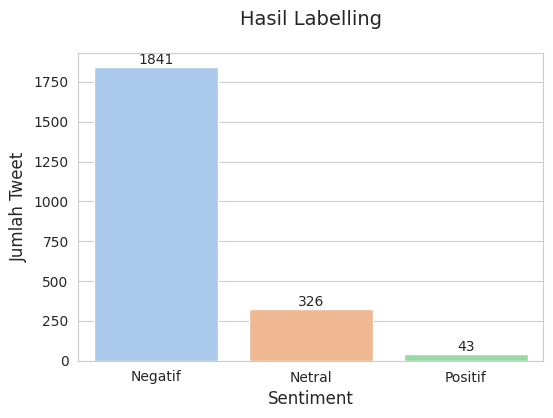

In [ ]:
# Membuat DataFrame baru untuk data sentiment label negatif (nilai 0)
negatif_df = df2[df2['sentiment label'] == 1]

# Membuat DataFrame baru untuk data sentiment label netral (nilai 1)
netral_df = df2[df2['sentiment label'] == 0]

# Membuat DataFrame baru untuk data sentiment label positif (nilai 2)
positif_df = df2[df2['sentiment label'] == 2]

# Hitung jumlah data sentiment label negatif dan positif
negatif_count = negatif_df.shape[0]
netral_count = netral_df.shape[0]
positif_count = positif_df.shape[0]

# Plot barplot untuk jumlah data sentiment label negatif dan positif
sns.set_style('whitegrid')

# Visualisasi Persebaran Sentimen
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_count, netral_count, positif_count], palette='pastel')
plt.title('Hasil Labelling', fontsize=14, pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate([negatif_count, netral_count,positif_count]):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()


*   Sebagian besar tweet (1.841 tweet) memiliki label sentimen negatif, menunjukkan bahwa mayoritas data memiliki pandangan atau respons yang tidak menyenangkan terhadap topik yang dianalisis.
*   Sebanyak 326 tweet memiliki label sentimen netral, yang berarti terdapat sejumlah kecil data yang tidak menunjukkan emosi positif atau negatif.
*   Hanya 43 tweet yang memiliki label sentimen positif, mengindikasikan bahwa hanya sedikit data yang memiliki pandangan atau respons positif.






#**WordCloud**

In [ ]:
# Buat DataFrame baru untuk label positif dan negatif
df_negatif = df2[df2['sentiment label'] == 1]
df_positif = df2[df2['sentiment label'] == 2]

###**Positif**

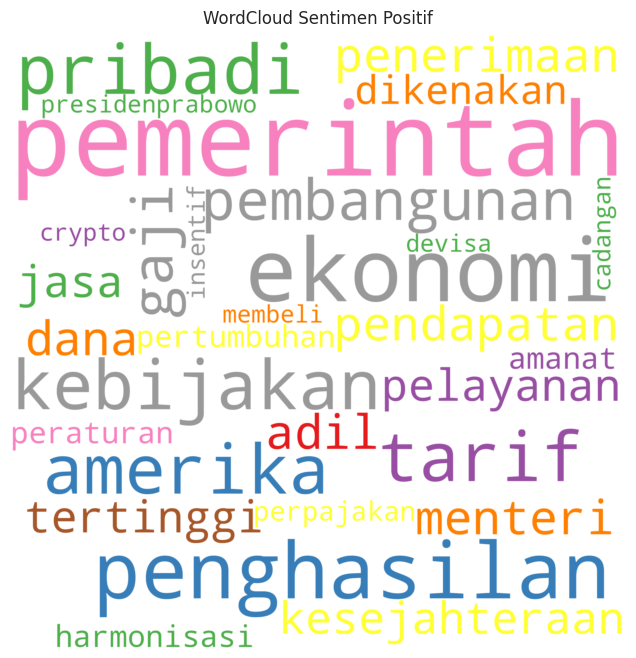

In [ ]:
from wordcloud import WordCloud # Import the WordCloud class
# Gabungkan semua teks dari kolom 'stemming' dalam DataFrame df1
all_text_s2 = ' '.join(word for word in df_positif['stopword_removal'].astype(str))

# Menghapus tanda apostrof (') menggunakan regex
cleaned_text = re.sub(r"'", "", all_text_s2)

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    max_words=30             # Set limitasi kata
).generate(cleaned_text)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')
plt.margins(x=0, y=0)
plt.show()

Berdasarkan WordCloud sentimen positif, terlihat bahwa kata "pemerintah" mendominasi, menunjukkan perhatian utama masyarakat pada langkah-langkah yang diambil oleh pemerintah. Kata-kata seperti "ekonomi," "kebijakan," dan "penghasilan" mencerminkan apresiasi terhadap kebijakan yang mendukung pertumbuhan ekonomi dan peningkatan penghasilan. Selain itu, istilah seperti "kesejahteraan," "pelayanan," dan "pembangunan" menunjukkan sentimen positif terhadap program-program yang dianggap meningkatkan kualitas hidup masyarakat. Beberapa kata seperti "tarif" dan "insentif" mengindikasikan dukungan terhadap upaya pemerintah dalam menciptakan kebijakan yang mendukung stabilitas ekonomi. Sentimen ini menggambarkan optimisme terhadap kontribusi pemerintah dalam bidang ekonomi dan pelayanan publik..

###**Negatif**

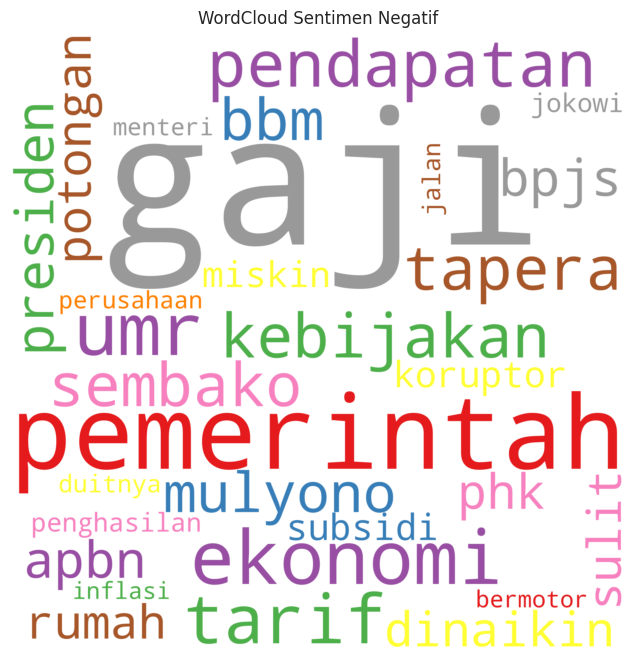

In [ ]:
all_text_s2 = ' '.join(word for word in df_negatif['stopword_removal'].astype(str))

# Menghapus tanda apostrof (') menggunakan regex
cleaned_text = re.sub(r"'", "", all_text_s2)

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    max_words=30             # Set limitasi kata
).generate(cleaned_text)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.margins(x=0, y=0)
plt.show()

Dari WordCloud sentimen negatif terlihat bahwa masyarakat banyak mengeluhkan masalah gaji, kebijakan pemerintah, dan biaya hidup. Kata-kata seperti "gaji", "pemerintah", "pendapatan", "kebijakan", dan "tarif" sangat dominan, menunjukkan ketidakpuasan terhadap kondisi ekonomi dan keputusan pemerintah. Selain itu, isu-isu seperti harga kebutuhan pokok, layanan BPJS, serta pengangguran juga menjadi perhatian besar. Sentimen negatif ini menggambarkan keresahan masyarakat terhadap beban ekonomi yang dirasa semakin berat.

In [ ]:
def extract_hashtags(teks):
    return re.findall(r"#\w+", teks)
df['hashtags'] = df['full_text'].apply(extract_hashtags)
df_mentions = df2[['user', 'target']]
df_mentions.dropna(inplace=True)

<ipython-input-61-a8fe17ca5ebd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtags'] = df['full_text'].apply(extract_hashtags)
<ipython-input-61-a8fe17ca5ebd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentions.dropna(inplace=True)


# **Analisis Sentralitas Pengguna dalam Jaringan Sosial**

In [ ]:
import networkx as nx
G = nx.Graph()
for _, row in df_mentions.iterrows():
    G.add_edge(row['user'], row['target'])

# Menghitung centrality (degree centrality, betweenness centrality, dan closeness centrality)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
# Menampilkan pengguna yang memiliki centrality tertinggi
top_degree_user = max(degree_centrality, key=degree_centrality.get)
top_betweenness_user = max(betweenness_centrality, key=betweenness_centrality.get)
top_closeness_user = max(closeness_centrality, key=closeness_centrality.get)
top_eigenvector_user = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Top Eigenvector Centrality: {top_eigenvector_user}")
print(f"Top Degree Centrality: {top_degree_user}")
print(f"Top Betweenness Centrality: {top_betweenness_user}")
print(f"Top Closeness Centrality: {top_closeness_user}")

Top Eigenvector Centrality: txtdrimedia
Top Degree Centrality: txtdrimedia
Top Betweenness Centrality: gue303030
Top Closeness Centrality: gue303030


"Txtdrimedia" memiliki koneksi terbanyak dan pengaruh yang besar dalam jaringan, menunjukkan bahwa node ini sangat terhubung dan memiliki posisi strategis. Sementara itu, "gue303030" berperan sebagai penghubung utama dalam jaringan, dengan kemampuan untuk menghubungkan berbagai bagian jaringan dan mencapai semua node dengan jarak yang lebih pendek, menjadikannya posisi yang sangat penting dalam aliran informasi dan komunikasi yang efisien.

In [ ]:
data1 = data[['username','in_reply_to_screen_name','favorite_count','retweet_count','quote_count','reply_count']]
data1.rename(columns={'username': 'user','in_reply_to_screen_name': 'target'}, inplace=True)

<ipython-input-63-cb978e473994>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={'username': 'user','in_reply_to_screen_name': 'target'}, inplace=True)


# **Top 10 Pengguna dengan Jumlah Tweet Terbanyak**

<ipython-input-64-25f22f36662d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top10user.index, y=top10user.values, palette='coolwarm')


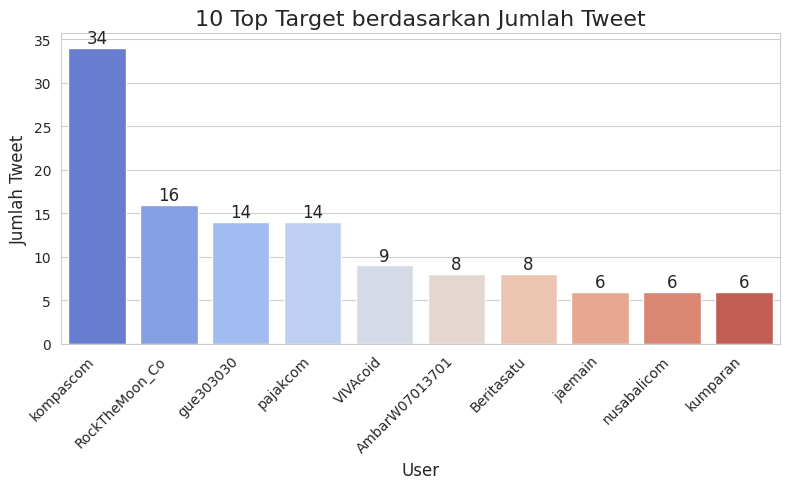

In [ ]:
topuser = data1['user'].value_counts()
top10user= topuser.head(10)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=top10user.index, y=top10user.values, palette='coolwarm')

for i, count in enumerate(top10user.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

plt.title('10 Top Target berdasarkan Jumlah Tweet', fontsize=16)
plt.xlabel('User', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik diatas menunjukkan 10 pengguna teratas berdasarkan jumlah kemunculan dalam data tweet. Kompascom mendominasi dengan 34 kemunculan, diikuti oleh RockTheMoon_Co dengan 16 kemunculan dan gue303030 serta pajakcom masing-masing 14 kemunculan. Pengguna lainnya seperti VIVAcoid dengan 9 kemunculan, AmbarW07013701 dan Beritasatu dengan 8 kemunculan serta jaemin, nusabalicom dan kompascam memiliki kontribusi paling kecil dengan masing-masing 6 kemunculan.

# **Top 10 pengguna dengan Jumlah Mention Terbanyak**

<ipython-input-65-a0d1db541ee5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top10target.index, y=top10target.values, palette='coolwarm')


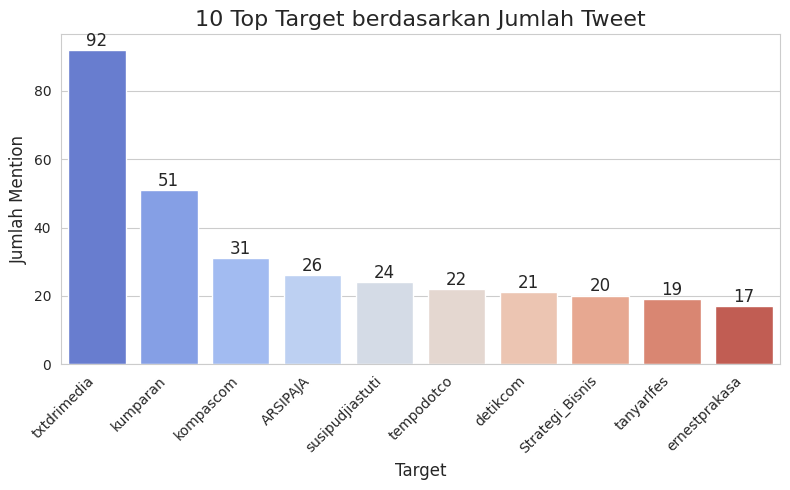

In [ ]:
toptarget = data1['target'].value_counts()
top10target = toptarget.head(10)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=top10target.index, y=top10target.values, palette='coolwarm')

for i, count in enumerate(top10target.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)

plt.title('10 Top Target berdasarkan Jumlah Mention', fontsize=16)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Jumlah Mention', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik menunjukkan 10 target teratas berdasarkan jumlah mention, dengan txtdrimedia urutan pertama (92 mention), diikuti kumparan (51 mention), kompascom (31 mention), ARSIPAJA(26 mention), sampai yang jumlah mentionnya paling sedikit yaitu ernestprakasa (17 mention)

# **Persebaran Jumlah Data Berdasarkan Tanggal**

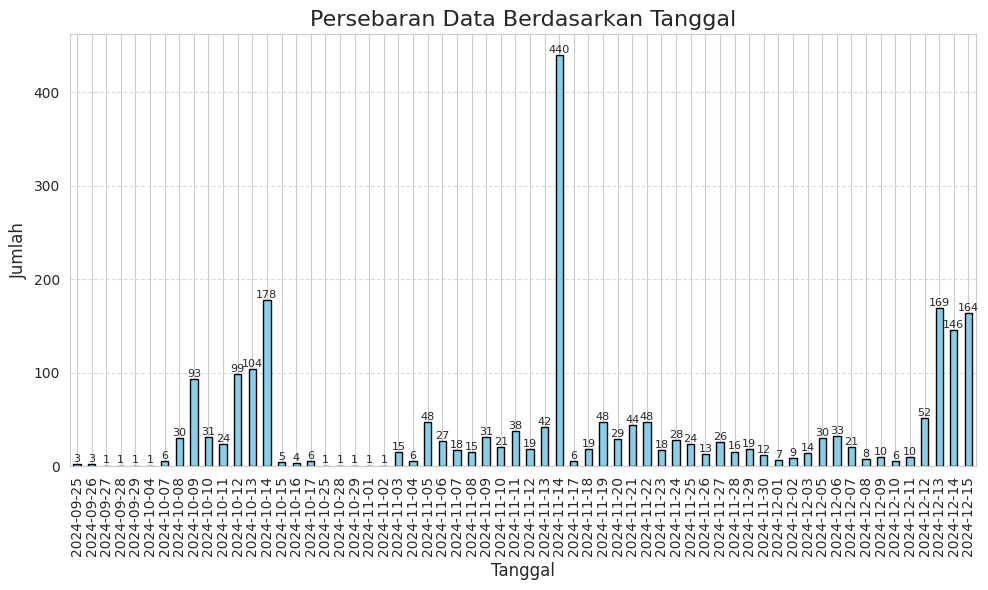

In [ ]:
data['created_at'] = pd.to_datetime(data['created_at'], format='%a %b %d %H:%M:%S %z %Y')
data['formatted_date'] = data['created_at'].dt.strftime('%d/%m/%Y')
data['formatted_date'] = pd.to_datetime(data['formatted_date'], format='%d/%m/%Y')

# Ekstraksi tanggal untuk persebaran
data['date'] = data['formatted_date'].dt.date

# Hitung jumlah per tanggal
date_counts = data['date'].value_counts().sort_index()

# Plot persebaran
plt.figure(figsize=(10, 6))
ax = date_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Tambahkan angka di atas setiap bar
for i, v in enumerate(date_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=8)

# Sesuaikan tampilan
plt.title('Persebaran Data Berdasarkan Tanggal', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Grafik menunjukkan persebaran data berdasarkan tanggal dengan puncak signifikan pada 14/11/2024 sebanyak 440 data, yang jauh lebih tinggi dibandingkan hari-hari lain. Pola ini menunjukkan adanya lonjakan aktivitas pada tanggal-tanggal tertentu, kemungkinan terkait dengan peristiwa tertentu atau kampanye spesifik.

# **Top 10 Pengguna dengan Jumlah Total Interaksi Terbesar**

<ipython-input-68-d4320b5e0fc3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['total_interactions'] = data1['favorite_count'] + data1['retweet_count'] + data1['quote_count'] + data1['reply_count']


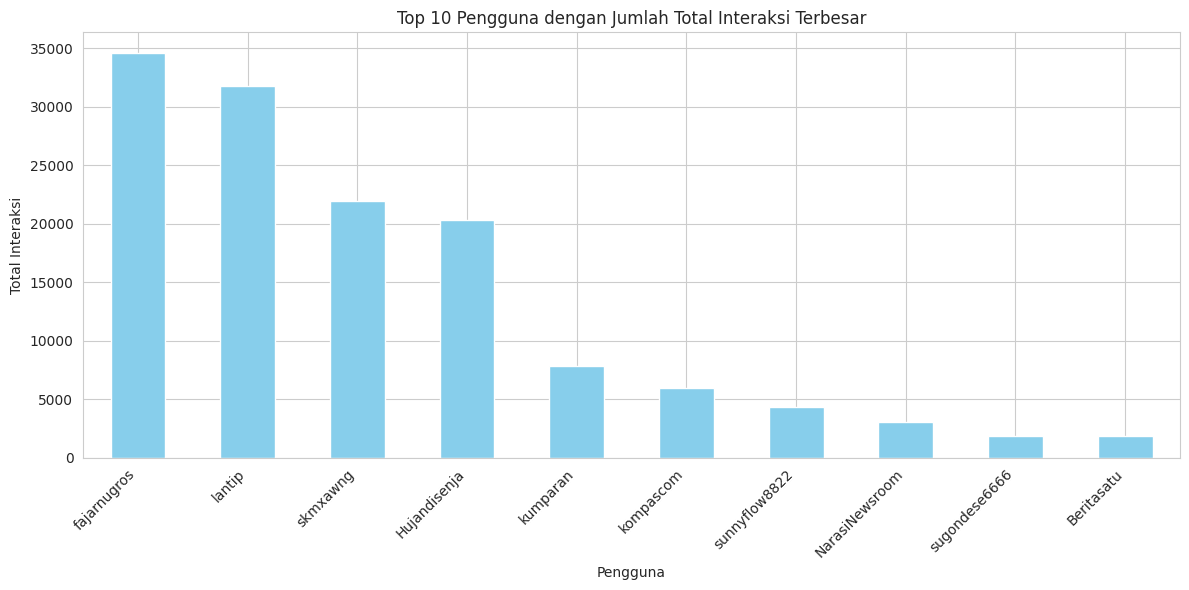

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung total interaksi per pengguna
data1['total_interactions'] = data1['favorite_count'] + data1['retweet_count'] + data1['quote_count'] + data1['reply_count']

# Mengelompokkan data berdasarkan 'user' dan menjumlahkan total interaksi
user_interactions = data1.groupby('user')['total_interactions'].sum().sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(12, 6))
user_interactions.head(10).plot(kind='bar', color='skyblue')  # Menampilkan 10 pengguna teratas
plt.title('Top 10 Pengguna dengan Jumlah Total Interaksi Terbesar')
plt.xlabel('Pengguna')
plt.ylabel('Total Interaksi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Agar label tidak terpotong
plt.show()

- Pengguna fajarmugros memiliki total interaksi tertinggi, yaitu Hampir mencapai 35.000
- Pengguna lantip berada di posisi kedua dengan total interaksi sekitar 33.000
- Pengguna skmxawng memiliki total interaksi sekitar 22.000.
- Pengguna Hujandisenja memiliki total interaksi sekitar 20.000.
- Pengguna kumparan memiliki total interaksi sekitar 8.000.
- Pengguna kompascom memiliki total interaksi sekitar 6.000.
- Pengguna sunnyflow8822 memiliki total interaksi sekitar 4.000.
- Pengguna NarasiNewsroom memiliki total interaksi sekitar 3.500.
- Pengguna sugondese6666 memiliki total interaksi sekitar 3.000.
- Pengguna Beritasatu memiliki total interaksi sekitar 2.500.

**INSIGHT**  

1. **Akun Personal Mendapatkan Interaksi Tinggi:**  
   - Akun personal seperti **fajarmugros** dan **lantip** memiliki total interaksi yang jauh lebih besar dibandingkan akun media atau organisasi.  

2. **Dominasi Akun Teratas:**  
   - Dua akun teratas, yaitu **fajarmugros** dan **lantip**, memiliki total interaksi yang sangat tinggi, yaitu lebih dari 30.000.

3. **Interaksi pada Akun Media Lebih Rendah:**  
   - Akun media seperti **kumparan**, **kompascom**, dan **Beritasatu** memiliki total interaksi yang lebih kecil dibandingkan beberapa akun personal, dengan jumlah interaksi masing-masing di bawah 10.000.  

4. **Distribusi Interaksi Tidak Merata:**  
   - Total interaksi menurun drastis setelah empat akun teratas, menunjukkan adanya konsentrasi perhatian pada sejumlah kecil akun tertentu.

# **Distribusi Sentimen pada 5 Target Terpopuler**

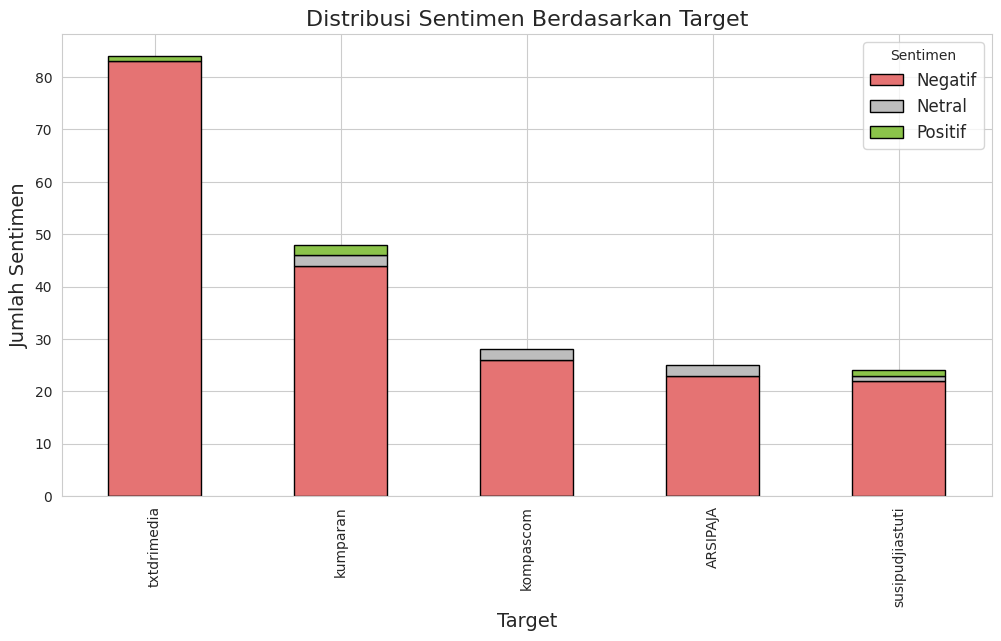

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Hitung jumlah sentimen per target
target_sentiment = df2.groupby(['target', 'sentiment label']).size().unstack(fill_value=0)

# Pilih target populer (contoh: top 5 target)
top_targets = target_sentiment.sum(axis=1).nlargest(5).index
top_target_sentiment = target_sentiment.loc[top_targets]

# Pemetaan nilai sentiment label ke label teks
sentiment_mapping = {0: 'Netral', 1: 'Negatif', 2: 'Positif'}
top_target_sentiment = top_target_sentiment.rename(columns=sentiment_mapping)

# Urutkan kolom sesuai dengan urutan yang diinginkan
ordered_columns = ['Negatif', 'Netral', 'Positif']
top_target_sentiment = top_target_sentiment[ordered_columns]

# Plot
top_target_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6),
                          color=['#e57373', '#bdbdbd', '#8bc34a'], edgecolor='black')
plt.title('Distribusi Sentimen Berdasarkan Target', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Jumlah Sentimen', fontsize=14)
plt.legend(title='Sentimen', fontsize=12)
plt.show()


   - Target **"twitmerdeka"** menjadi topik yang paling sering dibicarakan dibandingkan target lain, dengan jumlah sentimen tertinggi. Namun, sebagian besar sentimennya adalah **negatif**, yang menunjukkan ada banyak keluhan atau kritik terhadapnya.

   - Target **"kumparan"** dan **"kompascom"** memiliki jumlah sentimen yang cukup tinggi, tetapi tetap di bawah **"twitmerdeka"**. Seperti target lainnya, sentimen negatif juga mendominasi.  
   - Target seperti **"Susipudjiasturi"** dan **"ARSIPAJA"** hanya memiliki sedikit perhatian dibandingkan target lain, dengan jumlah sentimen yang rendah.

   - Semua target lebih banyak mendapatkan sentimen negatif dibandingkan sentimen netral atau positif.

#**SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
import nltk
from sklearn.utils import resample

#**Oversampling**

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Hitung jumlah data sentiment netral
netral_count = netral_df.shape[0]

# Lakukan oversampling pada data negatif dan positif untuk menyesuaikan dengan jumlah data netral
negatif_oversampled = resample(negatif_df, replace=True, n_samples=netral_count, random_state=42)
positif_oversampled = resample(positif_df, replace=True, n_samples=netral_count, random_state=42)

# Gabungkan kembali data yang telah diresample
df_balanced = pd.concat([netral_df, negatif_oversampled, positif_oversampled])

<ipython-input-72-429bd1691f63>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]], palette='pastel')


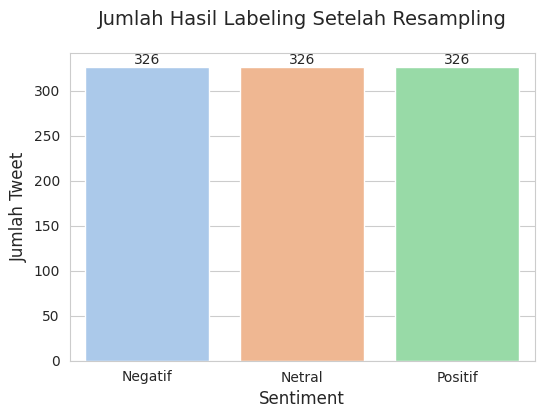

In [ ]:
# Plot barplot untuk jumlah data sentiment yang baru (oversampling)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]], palette='pastel')
plt.title('Jumlah Hasil Labeling Setelah Resampling', fontsize=14, pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate([negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]]):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()

Grafik tersebut menunjukkan hasil resampling data sentimen untuk kategori Negatif, Netral, dan Positif, dengan masing-masing kategori memiliki jumlah data yang sama, yaitu 326 tweet. Proses resampling dilakukan untuk mengatasi ketidakseimbangan jumlah data antar kategori sentimen, sehingga model analisis sentimen yang akan dibangun dapat lebih adil dan akurat dalam memprediksi setiap kategori tanpa bias. Hasil ini mencerminkan keberhasilan metode resampling dalam menciptakan distribusi data yang seimbang.

In [ ]:
# Pisah data train dan test
x = df_balanced['stemmed'].fillna('').apply(' '.join) # Join the tokens in each list into a single string
y = df_balanced['sentiment label'].fillna('')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Menggunakan TF-IDF untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_vec, y_train)
y_pred = svm_model.predict(x_test_vec)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif'])
print("Akurasi Model SVM: ", accuracy)
print("\nLaporan Klasifikasi:\n", classification_rep)

Akurasi Model SVM:  0.8081632653061225

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.85      0.60      0.70        83
      Netral       0.66      0.90      0.76        77
     Positif       0.98      0.93      0.95        85

    accuracy                           0.81       245
   macro avg       0.83      0.81      0.80       245
weighted avg       0.83      0.81      0.81       245



Model SVM yang digunakan untuk analisis sentimen ini mencapai akurasi keseluruhan sebesar 80.81%, yang menunjukkan performa yang cukup baik dalam mengklasifikasikan data. Berdasarkan laporan klasifikasi, kategori "Positif" menunjukkan hasil terbaik dengan precision sebesar 98%, recall 93%, dan F1-score 95%, yang menandakan model sangat baik dalam mengenali dan memprediksi sentimen positif. Sementara itu, kategori "Negatif" memiliki precision yang cukup tinggi, yaitu 85%, tetapi recall-nya hanya mencapai 60%, menunjukkan bahwa model kesulitan dalam mengidentifikasi sebagian besar data yang benar-benar bersentimen negatif. Kategori "Netral" memiliki recall yang sangat tinggi (90%), menandakan model mampu menangkap hampir semua data netral, tetapi precision-nya hanya 66%, yang mengindikasikan adanya kesalahan klasifikasi terhadap kategori lain. Rata-rata makro dari precision, recall, dan F1-score masing-masing adalah 83%, 81%, dan 80%, memberikan gambaran rata-rata performa di setiap kategori secara setara. Dengan rata-rata berbobot yang hampir sama, terlihat bahwa distribusi jumlah sampel per kategori memengaruhi hasil ini. Secara keseluruhan, meskipun performa model cukup baik, terdapat kelemahan yang perlu diperbaiki, khususnya pada recall di kategori negatif dan presisi di kategori netral. Langkah-langkah seperti oversampling data negatif, penyesuaian parameter model, atau penggunaan fitur tambahan dapat membantu meningkatkan hasil klasifikasi di masa depan.